### Exercise of Factor Analysis  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import japanize_matplotlib

Duplicate key in file WindowsPath('C:/Users/honda/miniconda3/envs/ds2023/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  sans-serif')


#### Parameters  

In [2]:
csv_in = 'Ski.csv'

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph

pd.set_option("display.max_colwidth", 200)

#### Read CSV data  

In [7]:
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0,encoding="shift-jis")
df = df.drop(columns='Unnamed: 0')
print(df.shape)
print(df.info())
display(df.head())

(24, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   好き      24 non-null     int64
 1   洒落      24 non-null     int64
 2   特色      24 non-null     int64
 3   動的      24 non-null     int64
 4   明い      24 non-null     int64
 5   強い      24 non-null     int64
 6   固い      24 non-null     int64
 7   安定      24 non-null     int64
 8   小い      24 non-null     int64
dtypes: int64(9)
memory usage: 1.8 KB
None


,好き,洒落,特色,動的,明い,強い,固い,安定,小い
0,5,5,6,3,3,3,5,3,2
1,7,6,6,6,6,5,5,6,2
2,3,3,3,3,3,3,5,5,3
3,5,5,5,5,5,5,5,5,3
4,3,3,3,5,5,6,2,3,5


#### Factor analysis  

In [8]:
fa = FactorAnalyzer(n_factors=2, rotation='promax', method='ml')
fa.fit(df.values)

FactorAnalyzer(method='ml', n_factors=2, rotation_kwargs={})

#### Correlation matrix (相関行列)   

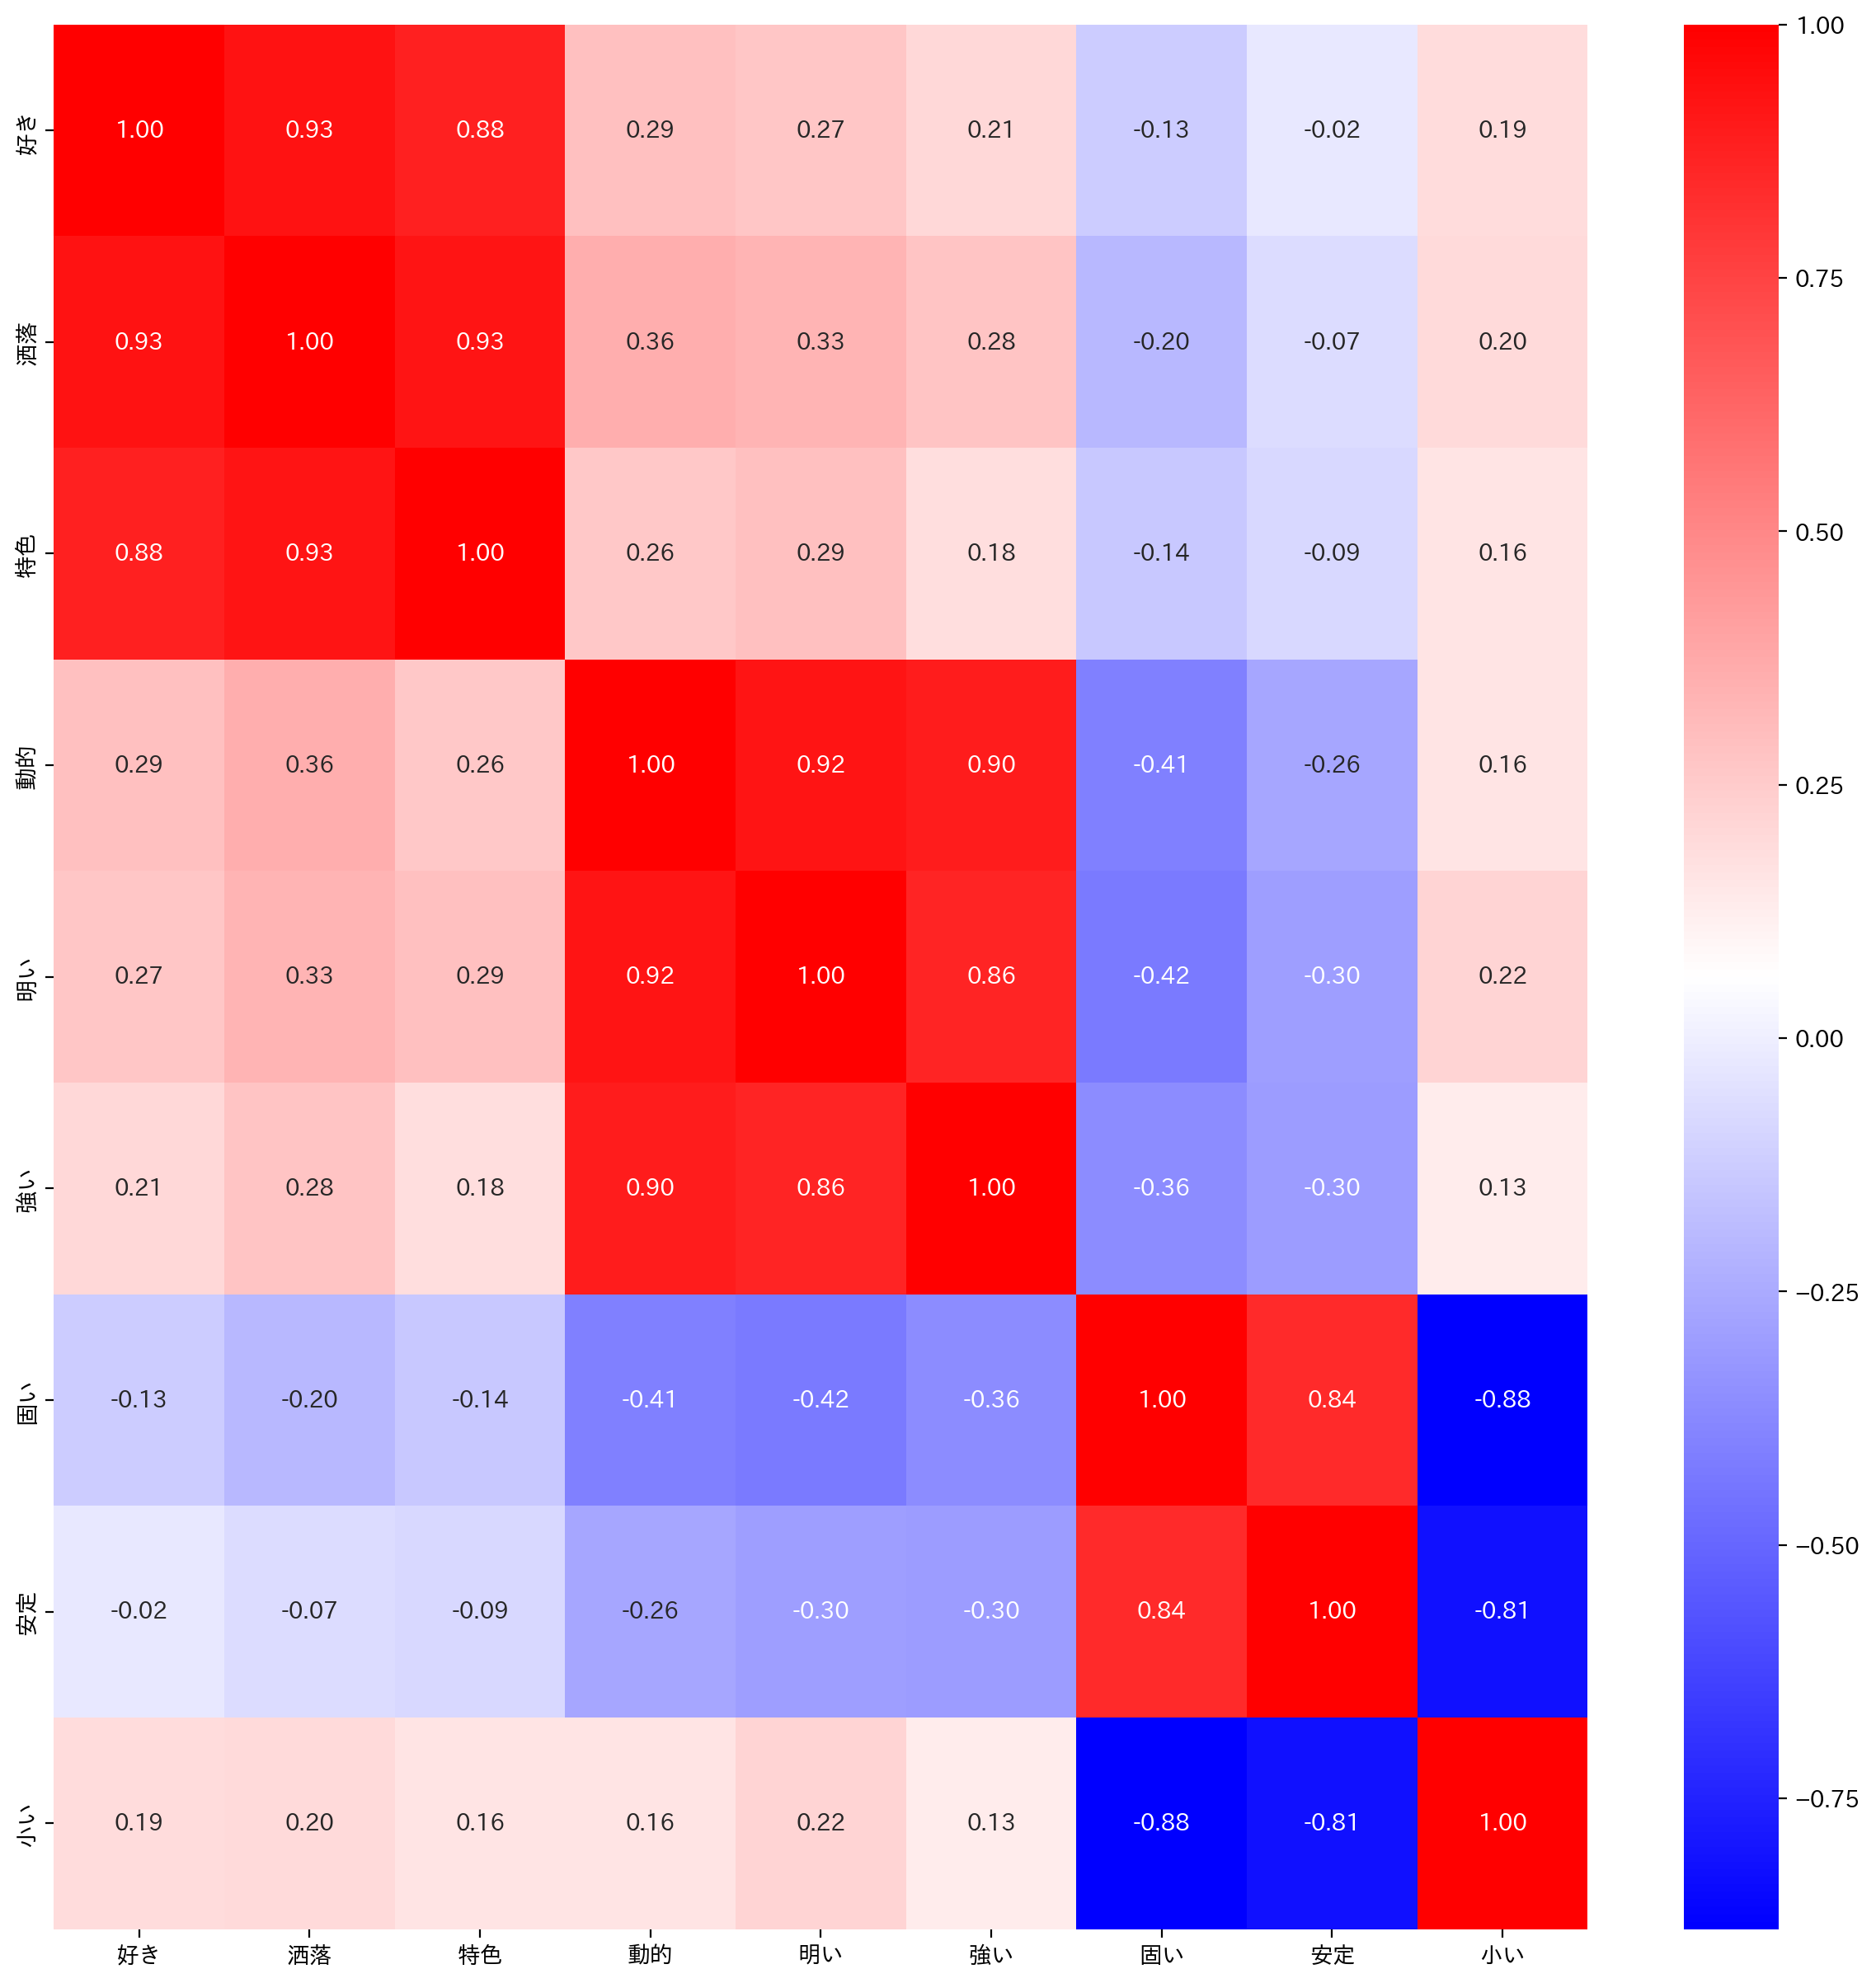

In [9]:
df_corr = df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='bwr')
plt.show()

#### Eigenvalues (固有値)  

In [10]:
eigen_org, eigen_cf = fa.get_eigenvalues()
print(type(eigen_org))
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

<class 'numpy.ndarray'>
0    4.184233
1    2.374653
2    1.801092
3    0.216377
4    0.152962
5    0.109104
6    0.079845
7    0.048985
8    0.032749
dtype: float64
0    3.955508
1    2.090878
2    1.289961
3    0.080559
4    0.046576
5    0.029769
6   -0.010299
7   -0.708795
8   -0.806375
dtype: float64


#### Scree plot (スクリープロット)  

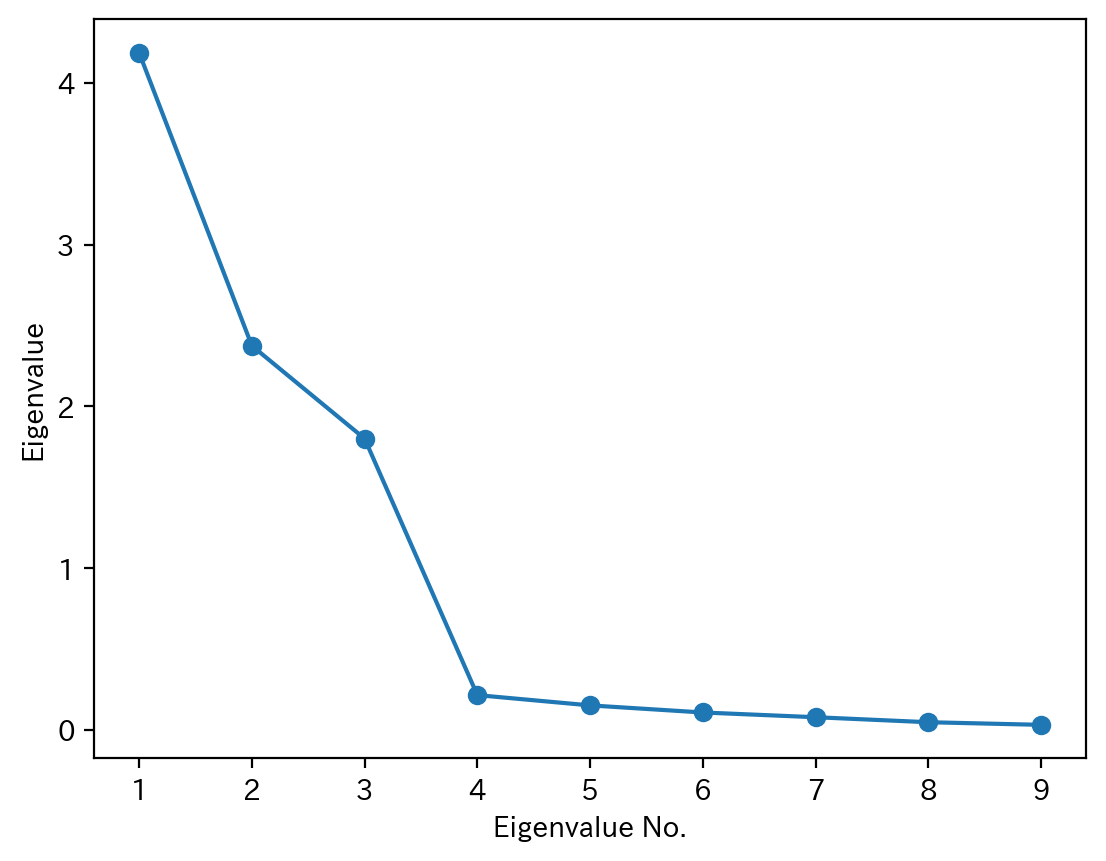

In [11]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

#### Factor analysis (n_factors=5)
共通因子数3で因子分析のやり直し 

In [12]:
fa = FactorAnalyzer(n_factors=3, rotation='promax', method='ml')
fa.fit(df.values)

FactorAnalyzer(method='ml', rotation_kwargs={})

#### Loadings (因子負荷量)  

In [13]:
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=df.columns,
                           columns=['Factor1','Factor2','Factor3'])
display(df_loadings)

,Factor1,Factor2,Factor3
好き,0.942902,-0.004347,0.010143
洒落,0.974212,0.054577,-0.008605
特色,0.942451,-0.025292,-0.001663
動的,0.033807,0.982529,0.022870
明い,0.023925,0.915334,-0.039300
強い,-0.033451,0.930287,0.022516
固い,0.000965,-0.136607,0.912502
安定,0.089129,-0.040118,0.879204
小い,0.092911,-0.159730,-0.974775


#### Scores (因子得点)  

In [14]:
scores = fa.transform(df)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2','Factor3'])
print(df_scores.shape)
display(df_scores.head())

(24, 3)


,Factor1,Factor2,Factor3
0,0.736712,-0.254410,0.460514
1,1.258831,1.469926,0.761850
2,-0.459288,-0.256888,0.406543
3,0.648176,0.948251,0.427290
4,-0.524176,1.105757,-1.063739


#### Uniquenesses (独自因子の割合)  

In [15]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=df.columns)
print(ser_uniqueness)

好き    0.110813
洒落    0.047858
特色    0.111145
動的    0.032971
明い    0.160047
強い    0.132940
固い    0.148678
安定    0.217447
小い    0.015668
dtype: float64


#### Contribution of each factor (各共通因子の寄与)  
- Variance: 因子負荷量平方和(因子寄与)  
- Proportion Var: 寄与率  
- Cumulative Var: 累積寄与率

In [17]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1','Factor2','Factor3'])
display(df_fa_var)

,Factor1,Factor2,Factor3
var,2.745779,2.718055,2.558599
prop_var,0.305087,0.302006,0.284289
cum_var,0.305087,0.607093,0.891381


#### biplot 

In [18]:
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1.5
    r2 = 1.01
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=10)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

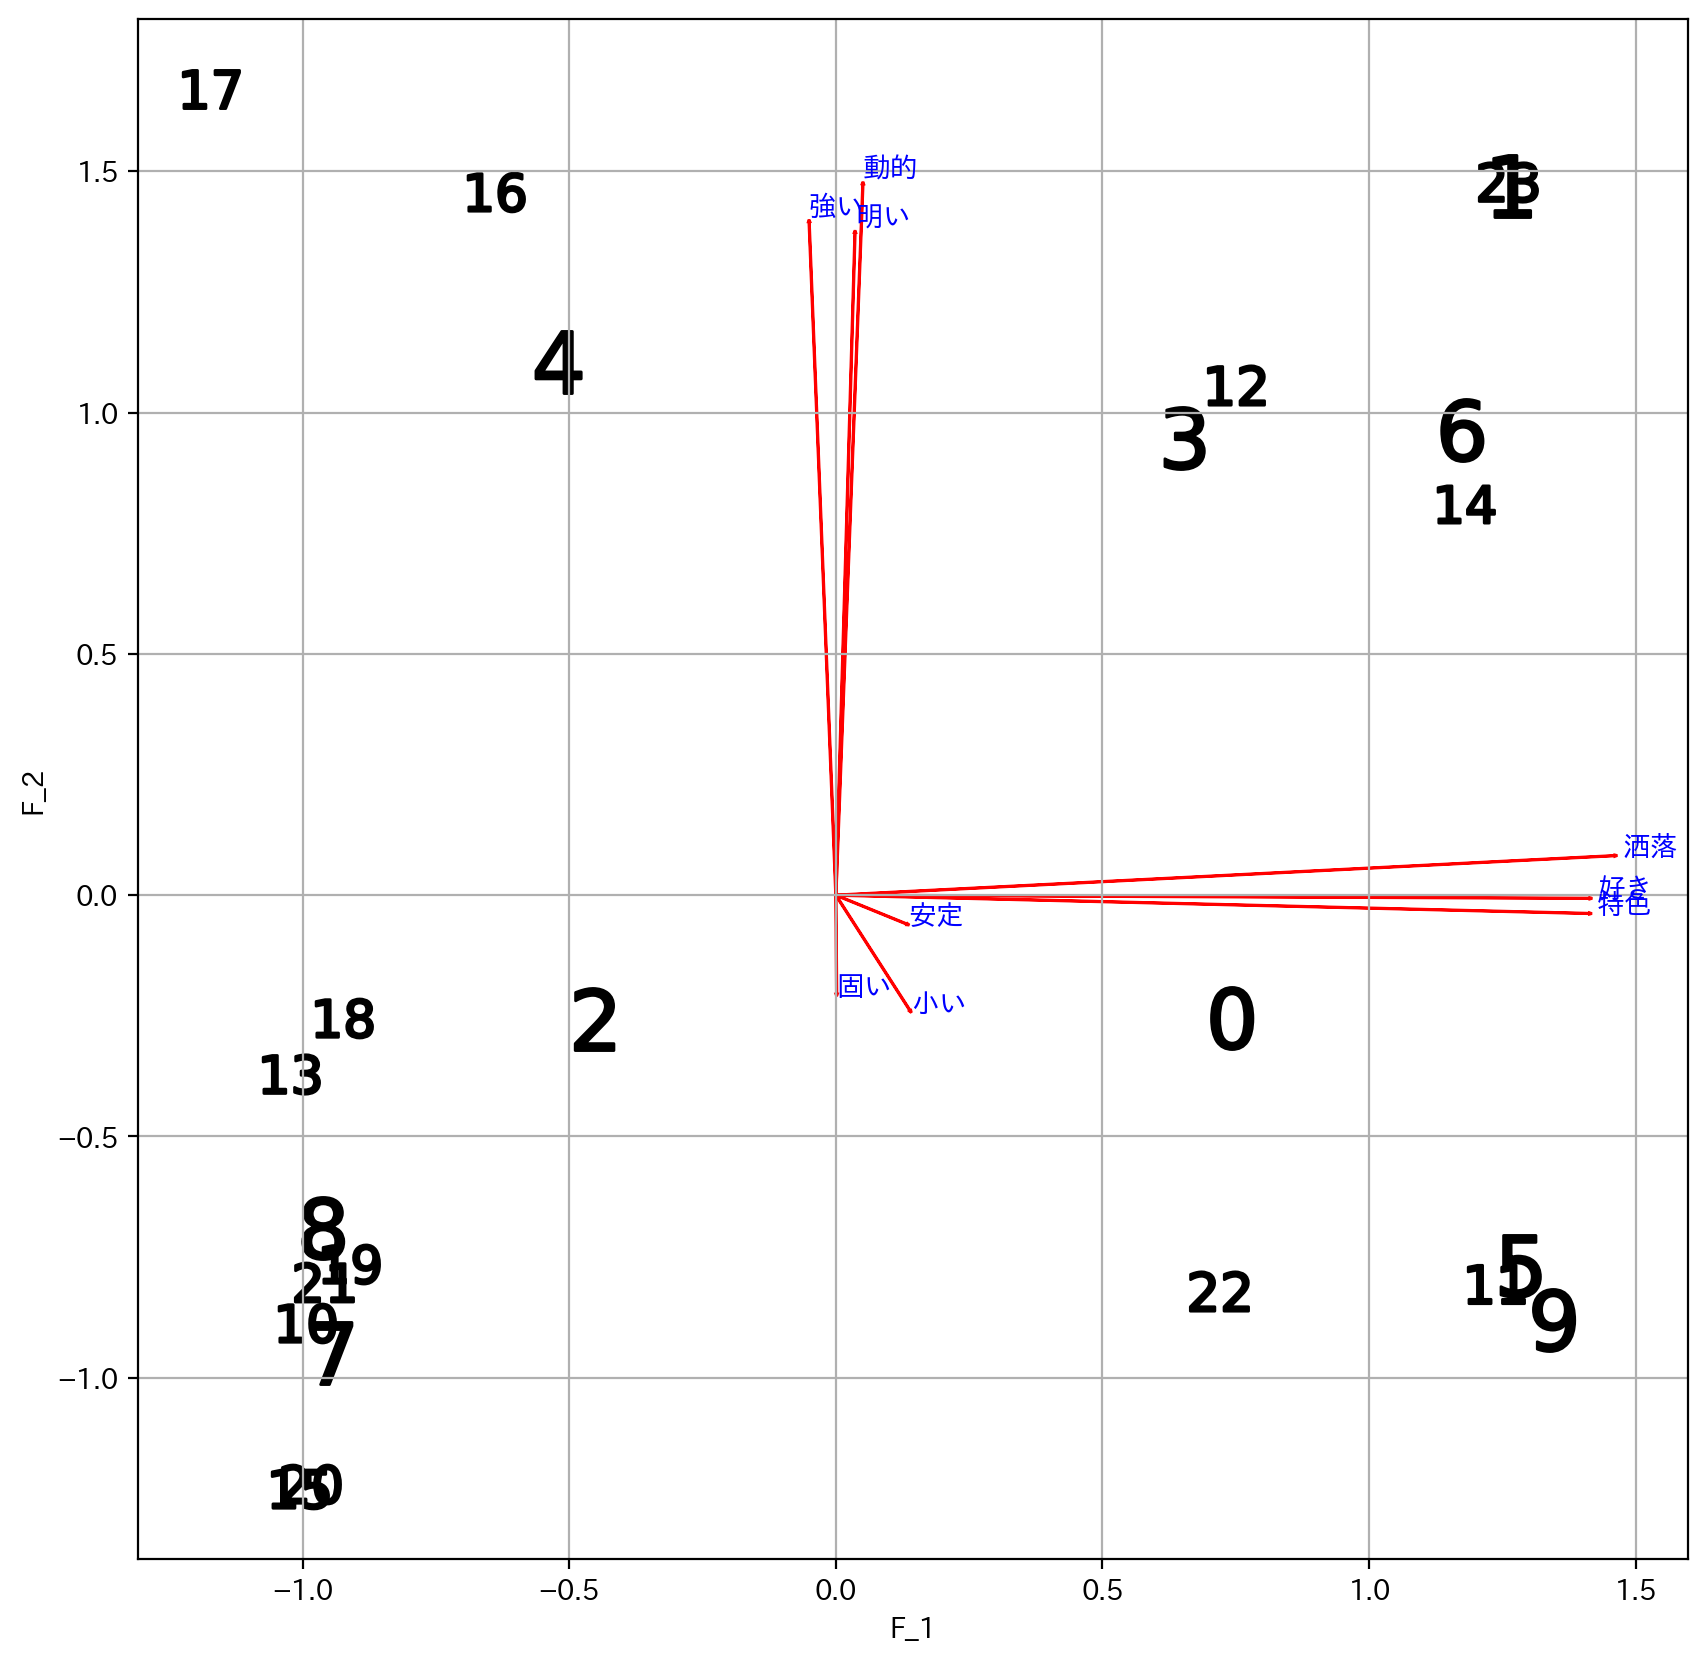

In [19]:
biplot_fa(scores, loadings, load_labels=df.columns)

In [21]:
results = []
for i in range(1, 4):
    col_name = "Factor{}".format(i)
    variables = df_loadings[col_name].abs().sort_values(ascending=False)[:3].index
    results.append([col_name, ",".join(variables)])

# Dataframe 
df_results = pd.DataFrame(results, columns=["Factor", "Top 3 Variables"])
display(df_results)

,Factor,Top 3 Variables
0,Factor1,"洒落,好き,特色"
1,Factor2,"動的,強い,明い"
2,Factor3,"小い,固い,安定"
